In [1]:
from AROMA import *
from AROMA.utils import *
from AROMA.config import *
import pandas as pd
from scipy.optimize import curve_fit

%matplotlib widget

pi = np.pi 

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx
print('def: find_nearest(array, value)')

def powerfunc_ten(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6,amp7,shift7,amp8,shift8,amp9,shift9,amp10,shift10):
    shifted1=amp1*shift(sinepw,shift1)
    shifted2=amp2*shift(sinepw,shift2)
    shifted3=amp3*shift(sinepw,shift3)
    shifted4=amp4*shift(sinepw,shift4)
    shifted5=amp5*shift(sinepw,shift5)
    shifted6=amp6*shift(sinepw,shift6)
    shifted7=amp1*shift(sinepw,shift7)
    shifted8=amp2*shift(sinepw,shift8)
    shifted9=amp3*shift(sinepw,shift9)
    shifted10=amp4*shift(sinepw,shift10)
    return shifted1+shifted2+shifted3+shifted4+shifted5+shifted6+shifted7+shifted8+shifted9+shifted10
print('def: powerfunc_ten(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6,amp7,shift7,amp8,shift8,amp9,shift9,amp10,shift10)')

def powerfunc_six(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6):
    shifted1=amp1*shift(sinepw,shift1)
    shifted2=amp2*shift(sinepw,shift2)
    shifted3=amp3*shift(sinepw,shift3)
    shifted4=amp4*shift(sinepw,shift4)
    shifted5=amp5*shift(sinepw,shift5)
    shifted6=amp6*shift(sinepw,shift6)
    return shifted1+shifted2+shifted3+shifted4+shifted5+shifted6
print('def: powerfunc_six(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6)')

def powerfunc_four(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4):
    shifted1=amp1*shift(sinepw,shift1)
    shifted2=amp2*shift(sinepw,shift2)
    shifted3=amp3*shift(sinepw,shift3)
    shifted4=amp4*shift(sinepw,shift4)
    return shifted1+shifted2+shifted3+shifted4
print('def: powerfunc_four(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4)')
      
def powerfunc(hpp,amp1,shift1,amp2,shift2,amp3,shift3):
    shifted1=amp1*shift(sinepw,shift1)
    shifted2=amp2*shift(sinepw,shift2)
    shifted3=amp3*shift(sinepw,shift3)
    return shifted1+shifted2+shifted3
print('def: powerfunc(hpp,amp1,shift1,amp2,shift2,amp3,shift3)')
      
def powerfuncsingle(hpp,amp1,shift1):
    shifted1=amp1*shift(sinepw,shift1)
    return shifted1
print('def: powerfuncsingle(hpp,amp1,shift1)')

import os
from os.path import join
array = os.path.abspath('').split('/')
homedir = '/'
for i in range(1,7):
   homedir = join(homedir, array[i])
homedir

import numpy.random as random
from astropy import units as u
import matplotlib.patches as patches
def: find_nearest(array, value)
def: powerfunc_six(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6)
def: powerfunc_four(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4)
def: powerfunc(hpp,amp1,shift1,amp2,shift2,amp3,shift3)
def: powerfuncsingle(hpp,amp1,shift1)
data_dir :  ~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data
data_path :  ~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/data/processed/luhman_16ab_sector36-37.txt
plot_dir :  ~/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping/plots
def: find_nearest(array, value)
def: powerfunc_ten(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6,amp7,shift7,amp8,shift8,amp9,shift9,amp10,shift10)
def: powerfunc_six(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6)
def: powerfunc_four(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4)
def: powerfunc(hpp,

'/Users/nguyendat/Documents/GitHub/aroma/AROMA_An_Exo_Rot_Mapping'

In [2]:
data = pd.read_csv(data_path, header=0, delimiter='\t')
plotPath = join(homedir, 'plots')

# data = data.query('TIME < 2293') # first half of sector 36 
# data = data.query('TIME > 2293 & TIME < 2306') # second half of sector 36 
# data = data.query('TIME < 2306') # full of sector 36

# data = data.query('TIME > 2306 & TIME < 2320') # first half of sector  37 
# data = data.query('TIME > 2320') # second half of sector  37 
# data = data.query('TIME > 2306') # full of sector 37

data = data # full light curve
data.TIME = (data.TIME -data.TIME.iloc[0])*24
fit_dir = join(homedir,'notebooks', 'periodSineFit_metadata')

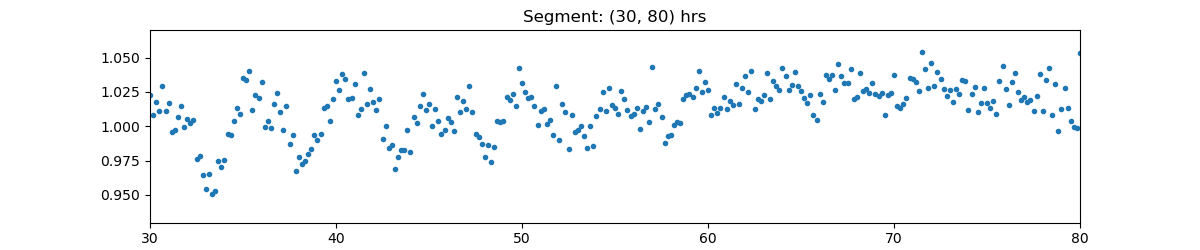

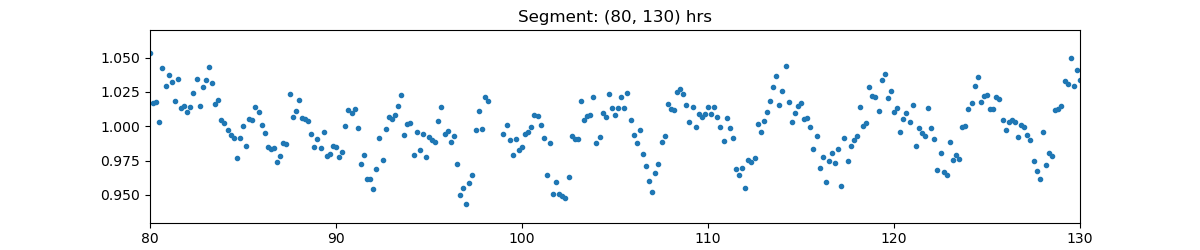

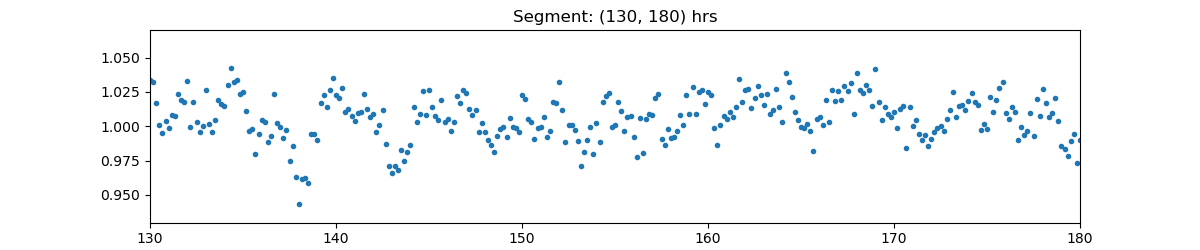

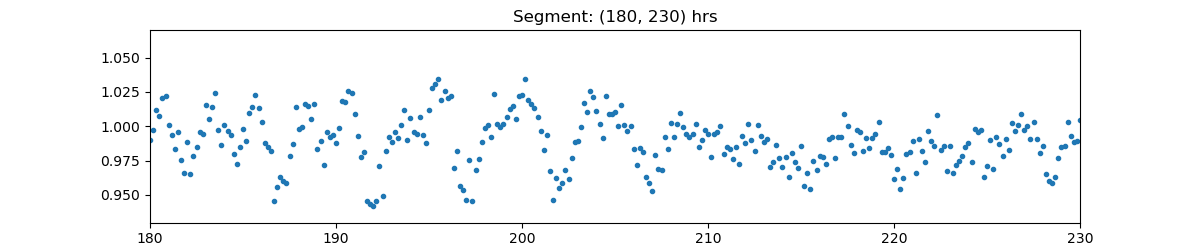

In [25]:
time, lc = data.TIME, data.PSF_FLUX_NORM
segments = [(30,80), (80,130), (130,180), (180,230)]
for seg in segments:
    plt.figure(figsize=(12, 2.5)), plt.plot(time, lc, ls='', marker='o', ms=3.0), plt.xlim(seg), plt.xlabel('Hrs'), plt.title("Segment: "+str(seg)+" hrs"), plt.ylim((0.93, 1.07))

In [4]:
def sixsines(time, a1, p1, a2, p2, a3, p3, a4, p4, a5, p5, a6, p6, offset):
    periods = np.array([4.58, 4.68, 4.98, 5.21, 5.26, 5.34])
    om = 2*pi/periods
    
    sine1 = a1 * np.sin(om[0]*time + p1)
    sine2 = a2 * np.sin(om[1]*time + p2)
    sine3 = a3 * np.sin(om[2]*time + p3)
    sine4 = a4 * np.sin(om[3]*time + p4)
    sine5 = a5 * np.sin(om[4]*time + p5)
    sine6 = a6 * np.sin(om[5]*time + p6)
    fit = sine1 + sine2 + sine3 + sine4 + sine5 + sine6 + offset
    
    if not residual: 
        return fit
    else:
        res = np.sum( ((data-fit)/0.003)**2 )
        return (fit, res)

def threesines (time, a1, p1, a2, p2, a3, p3, offset):
    periods = np.array([4.68, 4.98, 5.26])
    om = 2*pi/periods
    
    sine1 = a1 * np.sin(om[0]*time + p1)
    sine2 = a2 * np.sin(om[1]*time + p2)
    sine3 = a3 * np.sin(om[2]*time + p3)
    fit = sine1 + sine2 + sine3
    
    return fit
    

[ 0.01433354 -2.52592181  0.07005036  1.28758171  0.1083789   1.9780309
  2.        ]


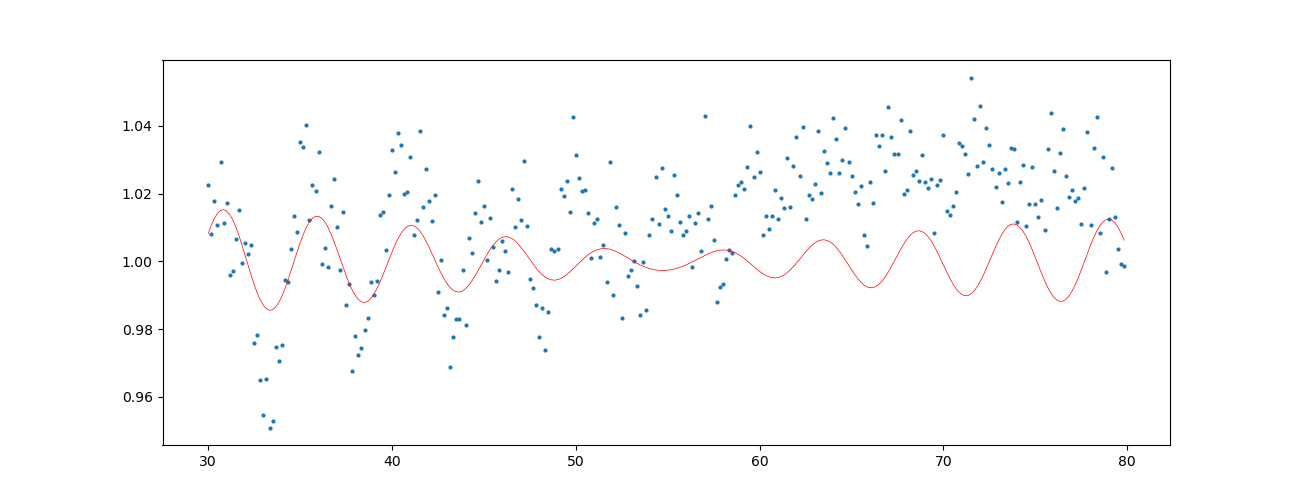

In [121]:
tlow, thigh = segments[0][0], segments[0][1]
# periods3 = np.array([4.68, 4.98, 5.26])
periods3 = np.array([4.68, 5.26, 5.34])
om3 = 2*pi/periods3

# a1, a2, a3 = 1,2,3
# p1, p2, p3 = 1,2,3
# plt.figure(figsize=(13,5)), plt.tight_layout()
# plt.plot(time, threesines(a1, p1, a2, p2, a3, p3, offset=0.5, time=time), ls='', marker='o', ms=2)

# guess = [1, 0.5, 
#          1, 0.5, 
#          1, 0.5, 
#          1]
lim = [(0, np.inf), (-np.inf, np.inf), 
       (0, np.inf), (-np.inf, np.inf), 
       (0, np.inf), (-np.inf, np.inf), 
       (0, np.inf)]
guesses=[0.5, -0.4, 0.5, 0.3, 0.5, -0.2, 2]

subset = data.query('TIME < %f & TIME >= %f'%(thigh, tlow))
timearr = subset.TIME
lcarr = subset.PSF_FLUX_NORM

popt, pcov = curve_fit(threesines, timearr, lcarr, p0=guesses, bounds=np.transpose(lim))
fit = 0.1*threesines(timearr, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6]) + 1
print(popt)

plt.figure(figsize=(13,5)), plt.tight_layout()
plt.plot(timearr, lcarr, ls='', marker='o', ms=2)
plt.plot(timearr, fit, c='r', lw=0.5)

# hyperOPT Decision Tree

In [62]:
import sklearn 
from sklearn.metrics import mean_squared_error, r2_score
from hyperopt import hp, tpe, Trials, fmin
import time
pi = np.pi

In [162]:
# choose time subset
tlow, thigh = segments[1]
subset = data.query('TIME < %f & TIME >= %f'%(thigh, tlow))

periods3 = np.array([4.68, 4.98, 5.26])
om3 = 2*pi/periods3
# w1, w2, w3 = om3[0], om3[1], om3[2]
w1, w2, w3 = 1.343, 1.262, 1.195

known_freq = True # prescribe 3 known freq
# known_freq = False # guess freq from fit

if known_freq:
    w1, w2, w3

In [163]:
# random split the data into train and test
x_data = subset.TIME
y_data = subset.PSF_FLUX_NORM
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

if known_freq:
    def objective(a0, a1, f1, a2, f2, a3, f3):
        """Objective function to minimize"""
        w1, w2, w3 = om3[0], om3[1], om3[2]
        return np.mean((a0+ a1 * np.sin(w1*X_train + f1) + a2 * np.sin(w2*X_train + f2) + a3 * np.sin(w3*X_train + f3) - y_train)**2)
    
    def objective2(args):
        return objective(*args)
else:
    def objective(a0, a1, f1, a2, f2, a3, f3, w1, w2, w3):
        """Objective function to minimize"""
        return np.mean((a0+ a1 * np.sin(w1*X_train + f1) + a2 * np.sin(w2*X_train + f2) + a3 * np.sin(w3*X_train + f3) - y_train)**2)

    def objective2(args):
        return objective(*args)

seed = 12345512
np.random.seed(seed)

In [164]:
from hyperopt import hp, tpe, Trials, fmin
from IPython.display import display, Math

if known_freq:
    space = [hp.uniform('a0', 0, 2),
             hp.uniform('a1', 0, 0.1), 
             hp.uniform('f1', -np.pi, np.pi),
             hp.uniform('a2', 0, 0.1), 
             hp.uniform('f2', -np.pi, np.pi),
             hp.uniform('a3', 0, 0.1), 
             hp.uniform('f3', -np.pi, np.pi)]
else:
    space = [hp.uniform('a0', 0, 2),
             hp.uniform('a1', 0, 0.1), 
             hp.uniform('f1', -np.pi, np.pi),
             hp.uniform('a2', 0, 0.1), 
             hp.uniform('f2', -np.pi, np.pi),
             hp.uniform('a3', 0, 0.1), 
             hp.uniform('f3', -np.pi, np.pi),
             hp.uniform('w1', 0, 3),
             hp.uniform('w2', 0, 3),
             hp.uniform('w3', 0, 3)]

tpe_algo = tpe.suggest
tpe_trials = Trials()

tpe_best = fmin(fn=objective2, space=space, algo=tpe_algo, trials=tpe_trials, max_evals=500, rstate=np.random.default_rng(seed))

if known_freq:
    print('Prescribed frequency')
    display(Math('\\omega_1={:.2f}, \\omega_2={:.2f}, \\omega_3={:.2f}'.format(*[w1, w2, w3])))

    print('Fitted parameters:')
    display(Math('a_0={a0:.5f}, a_1={a1:.2e}, \\phi_1={f1:.2f}, a_2={a2:.2e}, \\phi_2={f2:.2f}, a_3={a3:.2e}, \\phi_3={f3:.2f}'.format(**tpe_best)))
else:
    print('Fitted parameters:')
    display(Math('a_0={a0:.5f}, a_1={a1:.2e}, \\phi_1={f1:.2f}, a_2={a2:.2e}, \\phi_2={f2:.2f}, a_3={a3:.2e}, \\phi_3={f3:.2f}, \\omega_1={w1:.2f}, \\omega_2={w2:.2f}, \\omega_3={w3:.2f}'.format(**tpe_best)))

100%|████| 500/500 [00:05<00:00, 89.74trial/s, best loss: 0.0005007882709601641]
Prescribed frequency


<IPython.core.display.Math object>

Fitted parameters:


<IPython.core.display.Math object>

mse: 0.0005451254390511224
r2: -0.258211480669444
Prescribed frequency


<IPython.core.display.Math object>

Fitted parameters:


<IPython.core.display.Math object>

1.343, 1.262, 1.195


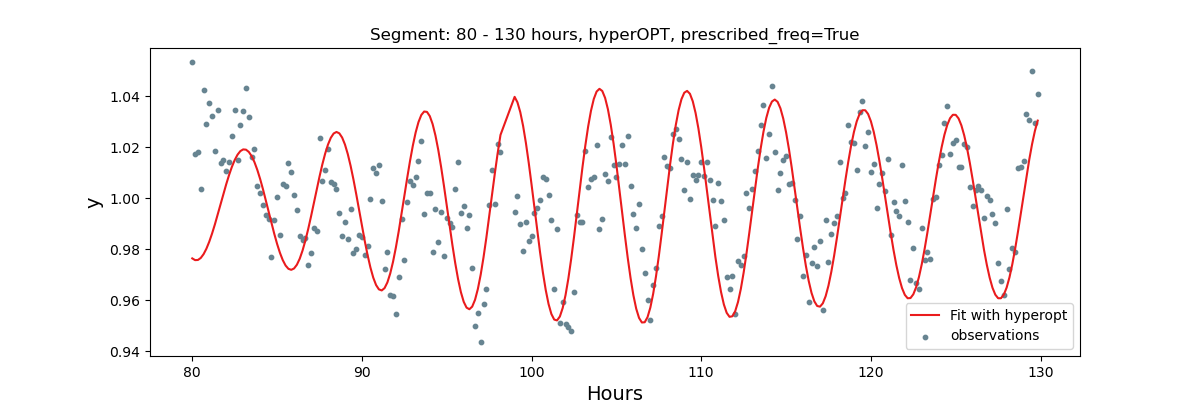

In [165]:
# Test
from sklearn.metrics import mean_squared_error, r2_score
x_data = subset.TIME
y_data = subset.PSF_FLUX_NORM
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=42)

if known_freq:
    ypred = tpe_best['a0']+ tpe_best['a1'] * np.sin(w1 * X_test + tpe_best['f1']) +tpe_best['a2'] * np.sin(w2 * X_test + tpe_best['f2']) +tpe_best['a3'] * np.sin(w3 * X_test + tpe_best['f3'])
    y = tpe_best['a0'] + tpe_best['a1'] * np.sin(w1* x_data + tpe_best['f1']) + tpe_best['a2'] * np.sin(w2 * x_data + tpe_best['f2']) + tpe_best['a3'] * np.sin(w3 * x_data + tpe_best['f3'])
else:
    ypred = tpe_best['a0']+ tpe_best['a1'] * np.sin(tpe_best['w1'] * X_test + tpe_best['f1']) +tpe_best['a2'] * np.sin(tpe_best['w2'] * X_test + tpe_best['f2']) +tpe_best['a3'] * np.sin(tpe_best['w3'] * X_test + tpe_best['f3'])
    y =  tpe_best['a0'] + tpe_best['a1'] * np.sin(tpe_best['w1']* x_data + tpe_best['f1']) + tpe_best['a2'] * np.sin(tpe_best['w2'] * x_data + tpe_best['f2']) + tpe_best['a3'] * np.sin(tpe_best['w3'] * x_data + tpe_best['f3'])    
    
rmse = mean_squared_error(y_test,ypred)
r2 = r2_score(y_test,ypred)
print('mse:', rmse)
print('r2:',r2)

fig, ax = plt.subplots(figsize=(12,4))
ax.scatter(x_data, y_data, label= 'observations', color= '#678491', s=10)
ax.plot(x_data, y, label= 'Fit with hyperopt', color='#EA1B1D')
ax.set_ylabel('y', fontsize= 14)
ax.set_xlabel('Hours', fontsize= 14)
plt.legend(loc='lower right')
plt.title('Segment: %i - %i hours, hyperOPT, prescribed_freq=%s'%(tlow, thigh, known_freq))

if known_freq:
    print('Prescribed frequency')
    display(Math('\\omega_1={:.2f}, \\omega_2={:.2f}, \\omega_3={:.2f}'.format(*[w1, w2, w3])))

    print('Fitted parameters:')
    display(Math('a_0={a0:.5f}, a_1={a1:.2e}, \\phi_1={f1:.2f}, a_2={a2:.2e}, \\phi_2={f2:.2f}, a_3={a3:.2e}, \\phi_3={f3:.2f}'.format(**tpe_best)))
else:
    print('Fitted parameters:')
    display(Math('a_0={a0:.5f}, a_1={a1:.2e}, \\phi_1={f1:.2f}, a_2={a2:.2e}, \\phi_2={f2:.2f}, a_3={a3:.2e}, \\phi_3={f3:.2f}, \\omega_1={w1:.2f}, \\omega_2={w2:.2f}, \\omega_3={w3:.2f}'.format(**tpe_best)))
    
print('%.3f, %.3f, %.3f'%(w1, w2, w3))

In [11]:
x_data

480    80.001625
481    80.168294
482    80.334964
483    80.501634
484    80.668304
         ...    
591    99.168641
592    99.335310
593    99.501980
594    99.668650
595    99.835319
Name: TIME, Length: 116, dtype: float64

# emcee Markov Chain Monte Carlo (MCMC)
Declare four functions:

1. **model()**: The model function should take as an argument a list representing our θ vector, and return the model evaluated at that θ.
2. **lnlike()**: This function takes as an argument theta as well as the x, y, and $y_\text{err}$ of your actual theta. It’s job is to return a number corresponding to how good a fit your model is to your data for a given set of parameters, weighted by the error in your data points
3. **lnprior()**: This function is to check - before running the probability function on any set of parameters - that all variables are within their priors (in fact, this is where we set our priors). Reasonable bounds on the amplitudes can be drawn from the data (e.g. amplitudes can't be greate than overall signal, periods within expected bounds, no negative amplitudes, etc).
4. **lnprob()**: This function combines the steps above by running the lnprior function, and if the function returned -np.inf, passing that through as a return, and if not (if all priors are good), returning the lnlike for that model (by convention we say it’s the lnprior output + lnlike output, since lnprior’s output should be zero if the priors are good). lnprob needs to take as arguments theta, x, y, and $y_\text{err}$ since these get passed through to lnlike. 

In [211]:
import emcee

tlow, thigh = segments[1]
subset = data.query('TIME < %f & TIME >= %f'%(thigh, tlow))
x_data = subset.TIME
y_data = subset.PSF_FLUX_NORM
y_err = subset.PSF_EFLUX

Data = (x_data, y_data, y_err)

def model(theta, t=x_data):
    a0, a1, f1, a2, f2, a3, f3, w1, w2, w3 = theta
    model = a0+ a1 * np.sin(w1*t + f1) + a2 * np.sin(w2*t + f2) + a3 * np.sin(w3*t + f3)
    return model

def lnlike(theta, x, y, yerr):
    LnLike = -0.5 * np.sum( (y-model(theta,t=x))/yerr )
    return LnLike

def lnprior(theta):
    a0, a1, f1, a2, f2, a3, f3, w1, w2, w3 = theta
    prior_pass_check = [a0>0, a1>0, a2>0, a3>0,
                        0<w1<2, 0<w2<3, 0<w3<3,
                    -10<f1<10, -10<f2<10, -10<f3<10]
    if np.all(prior_pass_check):
        return 0.0
    else:
        return -np.inf
    
def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if np.isinf(lp):
        return -np.inf
    else:
        return lp + lnlike(theta, x, y, yerr) #recall if lp not -inf, its 0, so this just returns likelihood

1. We also need to set a value for nwalkers, which determines how many walkers are initialized in our MCMC. Let’s use 500.
2. We need a variable called initial, which is an initial set of guesses (this will be the first theta, where the MCMC starts). **Foreman-Mackey & Hogg recommend that in many cases, running an optimizer first (e.g., from scipy) is the best way to select an initial starting value.**

In [212]:

#set nwalkers
nwalkers = 500
niter = 100
initial = np.array([1.0, 1e-2, 0.5, 1e-2, 1, 1e-2, 3, 1.3, 1.2, 1.1])
ndim = len(initial)
p0 = [np.array(initial) + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]

def main(p0,nwalkers,niter,ndim,lnprob,data):
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=Data)

    print("Running burn-in...")
    p0, _, _ = sampler.run_mcmc(p0, 100)
    sampler.reset()

    print("Running production...")
    pos, prob, state = sampler.run_mcmc(p0, niter)

    return sampler, pos, prob, state

sampler, pos, prob, state = main(p0,nwalkers,niter,ndim,lnprob,data)

Running burn-in...
Running production...


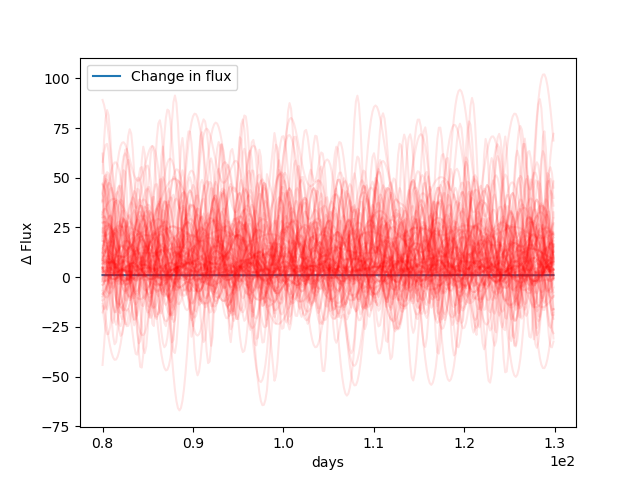

In [213]:
def plotter(sampler,t=x_data,flux=y_data):
    plt.figure()
    plt.plot(t,flux,label='Change in flux')
    samples = sampler.flatchain
    for theta in samples[np.random.randint(len(samples), size=100)]:
        plt.plot(t, model(theta, t), color="r", alpha=0.1)
        
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.xlabel('days')
    plt.ylabel(r'$\Delta$ Flux')
    plt.legend()
    plt.show()
plotter(sampler)

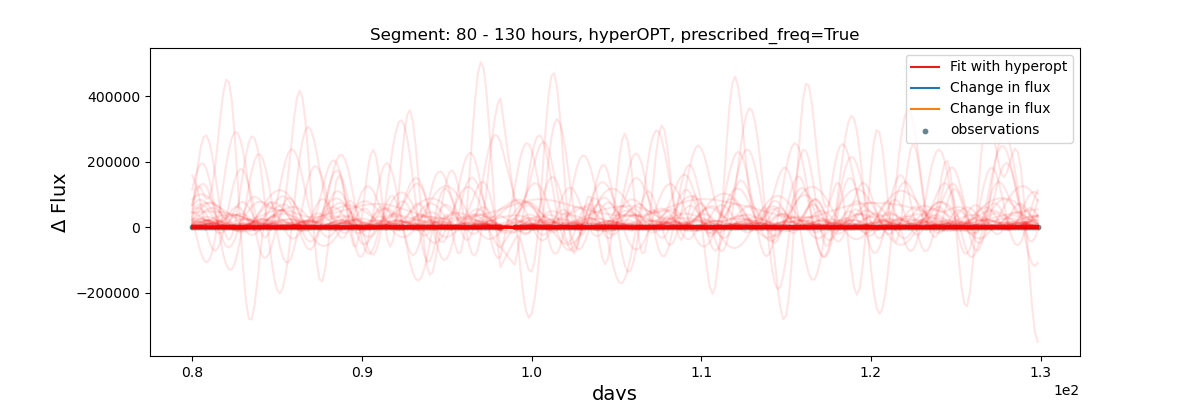